In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px

from bs4 import BeautifulSoup as soup
from urllib.request import Request, urlopen

from datetime import date, datetime

In [4]:
#Webscrapping package
#!pip install beautifulsoup4

# 3-D graph visiualization using plotly
#!pip install plotly

In [5]:
url = "https://www.worldometers.info/coronavirus/#countries"
#("https://www.myloancare.in/fixed-deposit/fd-interest-rates/")
req = Request(url, headers= {'User-Agent':"Mozilla/5.0"})
webpage = urlopen(req)
print(webpage)



<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="6
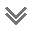

In [6]:
page_soup = soup(webpage, 'html.parser')
page_soup

In [7]:
today = datetime.now()
today

datetime.datetime(2022, 8, 21, 8, 15, 45, 177198)

In [8]:
yesterday_str = "%s %d, %d" %(date.today().strftime('%b'),today.day-1, today.year)
print(yesterday_str)
print(today )

Aug 20, 2022
2022-08-21 08:15:45.177198


In [10]:
table = page_soup.findAll('table', {'id' : "main_table_countries_yesterday"} )
table

[<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_yesterday" style="width:100%;margin-top: 0px !important;display:none;">
 <thead>
 <tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New 

In [11]:
containers = table[0].findAll('tr',{'style': ""})
containers

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>, <tr class="total_row_world">
 <td></td>
 <td style="text-align:left;">World</td>
 <td>600,229,142</td>
 <td>

In [15]:
title =containers[0]

del containers[0]
all_data =[]
clean = True

for country in containers:
  country_data = []
  country_container = country.findAll('td')

  if country_container[1].text == 'China':
    continue
  #loop through all the countries in the country_containers
  for i in range(1, len(country_container)):
    final_feature = country_container[i].text
    if clean:
      if i != 1 and i != len(country_container)-1:
        final_feature = final_feature.replace(",", "")

        #except the last line do the removing of + 
        if final_feature.find('+') != -1:
          final_feature = final_feature.replace("+","")
          final_feature = float(final_feature)
        elif final_feature.find('-') != -1:
          final_feature = final_feature.replace('-','')
          final_feature = float(final_feature)*-1
      if final_feature == 'N/A':
          final_feature = 0
      elif final_feature == "" or final_feature==" ":
          final_feature = -1
      
    country_data.append(final_feature)
  all_data.append(country_data)
    

In [16]:
all_data

[['USA',
  '95331020',
  6190.0,
  '1065555 ',
  40.0,
  '90631084',
  75822.0,
  '3634381',
  '4279',
  -1,
  -1,
  '1096033093',
  -1,
  -1,
  'North America',
  -1,
  -1,
  -1,
  -1,
  -1,
  -1],
 ['India',
  '44339429',
  11539.0,
  '527332 ',
  43.0,
  '43712218',
  26683.0,
  '99879',
  '698',
  '31471',
  '374',
  '882188283',
  '626153',
  '1408902983 ',
  'Asia',
  '32',
  '2672',
  '2',
  '8',
  '0.03',
  '71'],
 ['France',
  '34339792',
  19870.0,
  '153501 ',
  -1,
  '33706074',
  31461.0,
  '480217',
  '869',
  '523624',
  '2341',
  '271490188',
  '4139765',
  '65581065 ',
  'Europe',
  '2',
  '427',
  '0',
  '303',
  -1,
  '7,322'],
 ['Brazil',
  '34279785',
  15548.0,
  '682560  ',
  103.0,
  '33175714',
  -1,
  '421511',
  '8318',
  '158866',
  '3163',
  '63776166',
  '295565',
  '215777459 ',
  'South America',
  '6',
  '316',
  '3',
  '72',
  '0.5',
  '1,953'],
 ['Germany',
  '31808179',
  -1,
  '146504 ',
  -1,
  '30619000',
  23400.0,
  '1042675',
  '1406',
  '37707

In [17]:
df = pd.DataFrame(all_data)

In [19]:
df.head(4)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,USA,95331020,6190.0,1065555,40.0,90631084,75822.0,3634381,4279,-1,...,1096033093,-1,-1,North America,-1,-1,-1,-1,-1,-1
1,India,44339429,11539.0,527332,43.0,43712218,26683.0,99879,698,31471,...,882188283,626153,1408902983,Asia,32,2672,2,8,0.03,71
2,France,34339792,19870.0,153501,-1.0,33706074,31461.0,480217,869,523624,...,271490188,4139765,65581065,Europe,2,427,0,303,-1,"7,322"
3,Brazil,34279785,15548.0,682560,103.0,33175714,-1.0,421511,8318,158866,...,63776166,295565,215777459,South America,6,316,3,72,0.5,"1,953"


In [22]:
df.drop([15,16,17,18, 19, 20], inplace=True, axis=1)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,USA,95331020,6190.0,1065555,40.0,90631084,75822.0,3634381,4279,-1,-1,1096033093,-1,-1,North America
1,India,44339429,11539.0,527332,43.0,43712218,26683.0,99879,698,31471,374,882188283,626153,1408902983,Asia


In [25]:
column_name = ['Countr Other ', "Total Cases", "New Cases", "Total Deaths", "New Deaths", "Total Recovered", "New Recovered", "Active Cases",
               "Serious Critical", "Total Case/1M Pop", "Deaths/1M Pop", "Total Test", "Total Test/1M Pop", "Population", "Continent"]

In [26]:
df.columns = column_name
df.head(5)

,Countr Other,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Total Case/1M Pop,Deaths/1M Pop,Total Test,Total Test/1M Pop,Population,Continent
0,USA,95331020,6190.0,1065555,40.0,90631084,75822.0,3634381,4279,-1,-1,1096033093,-1,-1,North America
1,India,44339429,11539.0,527332,43.0,43712218,26683.0,99879,698,31471,374,882188283,626153,1408902983,Asia
2,France,34339792,19870.0,153501,-1.0,33706074,31461.0,480217,869,523624,2341,271490188,4139765,65581065,Europe
3,Brazil,34279785,15548.0,682560,103.0,33175714,-1.0,421511,8318,158866,3163,63776166,295565,215777459,South America
4,Germany,31808179,-1.0,146504,-1.0,30619000,23400.0,1042675,1406,377078,1737,122332384,1450219,84354426,Europe


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Countr Other       223 non-null    object 
 1   Total Cases        223 non-null    object 
 2   New Cases          223 non-null    float64
 3   Total Deaths       223 non-null    object 
 4   New Deaths         223 non-null    float64
 5   Total Recovered    223 non-null    object 
 6   New Recovered      223 non-null    float64
 7   Active Cases       223 non-null    object 
 8   Serious Critical   223 non-null    object 
 9   Total Case/1M Pop  223 non-null    object 
 10  Deaths/1M Pop      223 non-null    object 
 11  Total Test         223 non-null    object 
 12  Total Test/1M Pop  223 non-null    object 
 13  Population         223 non-null    object 
 14  Continent          223 non-null    object 
dtypes: float64(3), object(12)
memory usage: 26.3+ KB


In [35]:
#Note = in the datarame we can see the numeric columns are of object dataType, we need to convert it into Numeric

for label in df.columns:

  if label != "Countr Other " and label != "Continent":
    df[label] = pd.to_numeric(df[label])


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Countr Other       223 non-null    object 
 1   Total Cases        223 non-null    int64  
 2   New Cases          223 non-null    float64
 3   Total Deaths       223 non-null    int64  
 4   New Deaths         223 non-null    float64
 5   Total Recovered    223 non-null    int64  
 6   New Recovered      223 non-null    float64
 7   Active Cases       223 non-null    int64  
 8   Serious Critical   223 non-null    int64  
 9   Total Case/1M Pop  223 non-null    float64
 10  Deaths/1M Pop      223 non-null    float64
 11  Total Test         223 non-null    int64  
 12  Total Test/1M Pop  223 non-null    int64  
 13  Population         223 non-null    int64  
 14  Continent          223 non-null    object 
dtypes: float64(5), int64(8), object(2)
memory usage: 26.3+ KB


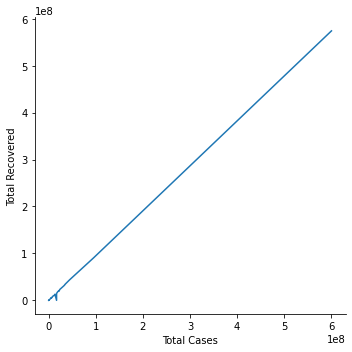

In [41]:
#Plot 
sns.relplot(x='Total Cases', y='Total Recovered', kind='line', data=df)

In [42]:
case = df[['Total Recovered', 'Active Cases','Total Deaths']].loc[0]
case

Total Recovered    90631084
Active Cases        3634381
Total Deaths        1065555
Name: 0, dtype: int64

In [44]:
cases_df = pd.DataFrame(case).reset_index()
cases_df

,index,0
0,Total Recovered,90631084
1,Active Cases,3634381
2,Total Deaths,1065555


In [46]:
#Renaming the column names of DataFrame

cases_df.columns = ['Type', 'Total']
cases_df

,Type,Total
0,Total Recovered,90631084
1,Active Cases,3634381
2,Total Deaths,1065555


In [48]:
# Percentage Calculation

cases_df['Percentage'] = np.round(100*cases_df['Tot22al']/np.sum(cases_df['Total']),2)
cases_df

,Type,Total,Percentage
0,Total Recovered,90631084,95.07
1,Active Cases,3634381,3.81
2,Total Deaths,1065555,1.12


In [49]:
#save the CSV file in your local machine,
cases_df.to_csv("total_covid_cases.csv")

In [53]:
fig = px.bar(cases_df, x='Type', y='Percentage', color='Type', hover_data=['Total'])
fig.show()

In [55]:
df['%inc cases'] = df['New Cases']/df['Total Cases'] * 100
df['%inc Deaths'] = df['New Deaths']/df['Total Deaths'] * 100
df['%inc Recovered'] = df['New Recovered']/df['Total Recovered'] * 100

In [56]:
percent = np.round(df[['%inc cases', '%inc Deaths','%inc Recovered']].loc[0], 2)
per_df = pd.DataFrame(percent)
per_df.columns = ['Percentage']
fig = go.Figure()

fig.add_trace(go.Bar(x= per_df.index, y = per_df['Percentage'], marker_color=['yellow','red', 'blue']))
fig.show()

In [58]:
df.tail()

,Countr Other,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Total Case/1M Pop,Deaths/1M Pop,Total Test,Total Test/1M Pop,Population,Continent,%inc cases,%inc Deaths,%inc Recovered
218,Montserrat,1106,-1.0,8,-1.0,1067,-1.0,31,-1,221289.0,1601.0,15598,3120848,4998,North America,-0.090416,-12.500000,-0.093721
219,Macao,793,-1.0,6,-1.0,785,-1.0,2,-1,1187.0,9.0,7850,11748,668190,Asia,-0.126103,-16.666667,-0.127389
220,Wallis and Futuna,761,-1.0,7,-1.0,438,-1.0,316,-1,70333.0,647.0,20508,1895379,10820,Australia/Oceania,-0.131406,-14.285714,-0.228311
221,Tuvalu,8,-1.0,-1,-1.0,-1,-1.0,8,-1,661.0,-1.0,-1,-1,12102,Australia/Oceania,-12.500000,100.000000,100.000000
222,Total:,600229142,628630.0,6470763,1256.0,574350248,789246.0,19408131,43899,77003.8,830.1,-1,-1,-1,All,0.104732,0.019410,0.137415
